<a href="https://colab.research.google.com/github/jebersonretnarajr/Image-Read-Example/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!git clone https://github.com/jebersonretnarajr/Image-Read-Example.git

Cloning into 'Image-Read-Example'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 3024 (delta 3), reused 0 (delta 0), pack-reused 3006
Receiving objects: 100% (3024/3024), 189.75 MiB | 37.49 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [0]:
label_name=["cats","dogs","panda"]

In [0]:

def load():
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
			label = imagePath.split("/")[-2]
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)
			
			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [5]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("Image-Read-Example/"))
print(imagePaths)

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
#sp = SimplePreprocessor(32, 32)
#sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = load()

data = data.reshape((data.shape[0], 3072))


# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)






[INFO] loading images...
['Image-Read-Example/3.jpg', 'Image-Read-Example/jetson_vali.jpg', 'Image-Read-Example/2.jpg', 'Image-Read-Example/4.jpg', 'Image-Read-Example/1.jpg', 'Image-Read-Example/dogs/dogs_00121.jpg', 'Image-Read-Example/dogs/dogs_00344.jpg', 'Image-Read-Example/dogs/dogs_00984.jpg', 'Image-Read-Example/dogs/dogs_00497.jpg', 'Image-Read-Example/dogs/dogs_00307.jpg', 'Image-Read-Example/dogs/dogs_00451.jpg', 'Image-Read-Example/dogs/dogs_00697.jpg', 'Image-Read-Example/dogs/dogs_00740.jpg', 'Image-Read-Example/dogs/dogs_00974.jpg', 'Image-Read-Example/dogs/dogs_00971.jpg', 'Image-Read-Example/dogs/dogs_00515.jpg', 'Image-Read-Example/dogs/dogs_00865.jpg', 'Image-Read-Example/dogs/dogs_00009.jpg', 'Image-Read-Example/dogs/dogs_00454.jpg', 'Image-Read-Example/dogs/dogs_00618.jpg', 'Image-Read-Example/dogs/dogs_00019.jpg', 'Image-Read-Example/dogs/dogs_00861.jpg', 'Image-Read-Example/dogs/dogs_00874.jpg', 'Image-Read-Example/dogs/dogs_00109.jpg', 'Image-Read-Example/dogs/d

In [6]:
# train and evaluate a k-NN classifier on the raw pixel intensities)
print("[INFO] evaluating k-NN classifier...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainX, trainY)

[INFO] evaluating k-NN classifier...


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

panda


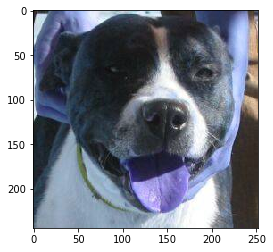

In [7]:
img=cv2.imread("Image-Read-Example/dogs/dogs_00018.jpg")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
b = np.expand_dims(img1, axis=0)
res=model.predict(b)
print(label_name[int(res)])

plt.imshow(img)

In [8]:
print(classification_report(testY, model.predict(testX),	target_names=le.classes_))

                    precision    recall  f1-score   support

Image-Read-Example       1.00      1.00      1.00         1
              cats       0.39      0.53      0.45       243
              dogs       0.42      0.49      0.46       261
             panda       0.78      0.36      0.49       247

          accuracy                           0.46       752
         macro avg       0.65      0.60      0.60       752
      weighted avg       0.53      0.46      0.46       752

